In [120]:
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

In [121]:
import matplotlib.pyplot as plt
import os
import pickle

In [122]:
from numpy.random import seed 
seed(200)

In [123]:
data = pd.read_excel('data/CO2_20250208.xlsx', sheet_name='CO2 solubility data')

In [124]:
data.head(8)

,No.,IL,x_CO2 (mol/kg sorbent),T (K),P (bar),F1,F2,F3,F4,F5,...,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44
0,1,[Bis(mim)C2][Gly]2,0.8504,313.15,0.1154,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,[Bis(mim)C2][Gly]2,1.1442,313.15,0.2692,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,[Bis(mim)C2][Gly]2,1.4535,313.15,0.5385,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,[Bis(mim)C2][Gly]2,2.3503,313.15,0.8462,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,[Bis(mim)C2][Gly]2,2.4895,313.15,1.3077,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,[Bis(mim)C2][Gly]2,2.5823,313.15,1.7308,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,[Bis(mim)C2][Gly]2,2.6132,313.15,2.0000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,[Bis(mim)C2][Gly]2,2.6441,313.15,2.9615,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
print(data.shape)

(2500, 49)


In [126]:
exclude =['No.','IL']
y='x_CO2 (mol/kg sorbent)'
features = [var for var in data.columns if var not in exclude+[y]]
print(len(features), len(exclude))

46 2


In [127]:
data[features].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T (K)    2500 non-null   float64
 1   P (bar)  2500 non-null   float64
 2   F1       2500 non-null   int64  
 3   F2       2500 non-null   int64  
 4   F3       2500 non-null   int64  
 5   F4       2500 non-null   int64  
 6   F5       2500 non-null   int64  
 7   F6       2500 non-null   int64  
 8   F7       2500 non-null   int64  
 9   F8       2500 non-null   int64  
 10  F9       2500 non-null   int64  
 11  F10      2500 non-null   int64  
 12  F11      2500 non-null   int64  
 13  F12      2500 non-null   int64  
 14  F13      2500 non-null   int64  
 15  F14      2500 non-null   int64  
 16  F15      2500 non-null   int64  
 17  F16      2500 non-null   int64  
 18  F17      2500 non-null   int64  
 19  F18      2500 non-null   int64  
 20  F19      2500 non-null   int64  
 21  F20      2500 

In [128]:
single_var =[]
for var in features:
    print(var, "----",len(data[var].unique()),data[var].unique())
    if len(data[var].unique())==1:
        single_var.append(var)

T (K) ---- 48 [313.15 293.15 303.15 323.15 298.2  298.1  298.   298.3  288.15 298.15
 308.15 318.15 303.16 313.28 313.31 323.32 323.34 333.35 333.36 333.41
 353.55 353.18 295.15 283.1  323.1  348.1  348.2  310.15 333.15 343.15
 303.2  313.2  323.2  343.2  353.2  328.15 338.15 333.2  295.12 353.15
 296.15 373.15 393.15 308.   318.   328.   338.   283.15]
P (bar) ---- 1112 [0.1154 0.2692 0.5385 ... 0.234  0.239  0.419 ]
F1 ---- 4 [ 2  1  0 10]
F2 ---- 2 [0 1]
F3 ---- 3 [0 2 1]
F4 ---- 2 [0 1]
F5 ---- 2 [0 1]
F6 ---- 5 [ 0  1  2  3 10]
F7 ---- 2 [0 1]
F8 ---- 2 [0 1]
F9 ---- 2 [0 1]
F10 ---- 4 [0 3 2 1]
F11 ---- 2 [0 1]
F12 ---- 3 [0 2 1]
F13 ---- 3 [0 1 2]
F14 ---- 2 [0 1]
F15 ---- 11 [ 2  4  5  3 20  1  6  8 12  7 40]
F16 ---- 32 [  4   2   6   3   5   7   8   1  25  11  14   0  10  31  29  30  32  20
  26  21  12  24  22  33  17  13  16  28 295  58  57  56]
F17 ---- 3 [0 1 2]
F18 ---- 2 [0 1]
F19 ---- 2 [0 1]
F20 ---- 3 [0 2 1]
F21 ---- 2 [0 1]
F22 ---- 14 [ 6 12 22  3  0 11  8  4  2 1

In [129]:
single_var

[]

In [130]:
use_features = [var for var in features if data[var].dtype in ['int64', 'float64']]

print(f"number of features: {len(use_features)}")
print(f"include: {use_features}")

number of features: 46
include: ['T (K)', 'P (bar)', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44']


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    data[use_features], data[y], test_size=0.2, random_state=512
)

In [132]:
sc = StandardScaler()
sc.fit(X_train[use_features])

StandardScaler()

In [133]:
sc.mean_

array([3.10632380e+02, 1.83707045e+00, 4.51000000e-01, 5.00000000e-04,
       1.34500000e-01, 4.30000000e-02, 1.72500000e-01, 4.72000000e-01,
       2.15000000e-02, 9.00000000e-03, 9.00000000e-03, 4.50000000e-03,
       2.00000000e-03, 1.21000000e-01, 3.90000000e-02, 6.15000000e-02,
       3.44700000e+00, 1.29545000e+01, 3.31000000e-01, 4.00000000e-03,
       1.19000000e-01, 1.20000000e-01, 1.65000000e-02, 3.68900000e+00,
       8.30000000e-01, 1.65000000e-01, 4.60000000e-02, 1.65000000e-02,
       1.42000000e-01, 1.85000000e-02, 5.05500000e-01, 7.14000000e-01,
       6.55000000e-02, 5.85000000e-02, 5.15000000e-02, 9.80000000e-02,
       2.70000000e-02, 1.00000000e-03, 6.30000000e-02, 3.65000000e-02,
       1.65000000e-02, 6.00000000e-03, 3.35000000e-02, 1.00000000e-02,
       5.00000000e-04, 1.00000000e-03])

In [134]:
X_train_scale = sc.transform(X_train[use_features])
X_test_scale = sc.transform(X_test[use_features])

In [135]:
X_train[use_features].head(1)

,T (K),P (bar),F1,F2,F3,F4,F5,F6,F7,F8,...,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44
268,288.15,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X_train_scale[0:1]

array([[-1.25694529,  0.55835751,  0.86416626, -0.02236627, -0.32774696,
        -0.21197188, -0.45657334, -0.59221756, -0.14823092, -0.09529814,
        -0.09529814, -0.0488676 , -0.04476615, -0.30122345, -0.16708984,
        -0.25598848, -0.54581662, -0.43457622, -0.58748645, -0.06337243,
        -0.36752385, -0.36753834, -0.12952535, -0.19788331,  0.1258362 ,
        -0.34725301, -0.1627526 , -0.12952535, -0.30565141, -0.13729057,
         0.74892464,  0.3242047 , -0.26474697, -0.21789901, -0.23301557,
        -0.29231469, -0.166581  , -0.0316386 , -0.25929878, -0.19463484,
        -0.12952535, -0.0776931 , -0.18617505, -0.10050378, -0.02236627,
        -0.0316386 ]])

In [137]:
import time

In [138]:
gbr = GradientBoostingRegressor(random_state=256)

In [139]:
param_distributions = {

    'n_estimators': randint(50, 300), 
    'max_depth': randint(2, 8), 
    'learning_rate': uniform(0.01, 0.2),
    

    'subsample': uniform(0.6, 0.4),
    'max_features': uniform(0.5, 0.5),
    'min_samples_split': randint(5, 20),
    'min_samples_leaf': randint(2, 10),
}

In [140]:
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=256
)

In [141]:
print("Begin...")
start_time = time.time()
random_search.fit(X_train[use_features], y_train)
end_time = time.time()
print(f"Finish！After {end_time - start_time:.2f} seconds")


best_gbr = random_search.best_estimator_
print("\n" + "="*60)
print("parameters")
print("="*60)
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nrandom search best socre  (-MSE): {random_search.best_score_:.6f}")
print(f"MSE: {-random_search.best_score_:.6f}")
print("="*60)

Begin...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Finish！After 39.47 seconds

parameters
learning_rate: 0.20033387235899108
max_depth: 7
max_features: 0.6913408610608082
min_samples_leaf: 2
min_samples_split: 19
n_estimators: 244
subsample: 0.6133641874558701

random search best socre  (-MSE): -0.121913
MSE: 0.121913


In [142]:
actual_trees = len(best_gbr.estimators_)
print(f"actural trees: {actual_trees}")
print(f"seting n_estimators : {best_gbr.n_estimators}")

actural trees: 244
seting n_estimators : 244


In [143]:
def comprehensive_model_evaluation(model, X_train, y_train, X_test, y_test, model_name="Model"):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    def calculate_metrics(y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        

        with np.errstate(divide='ignore', invalid='ignore'):
            relative_errors = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None))
            aard = 100 * np.nanmean(relative_errors)
        
        return {
            'R2': r2, 
            'MAE': mae, 
            'MSE': mse, 
            'RMSE': rmse, 
            'AARD%': aard
        }
    

    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    

    overfitting_gap = {
        'R2_gap': train_metrics['R2'] - test_metrics['R2'],
        'MSE_ratio': train_metrics['MSE'] / test_metrics['MSE'],
        'AARD_increase': test_metrics['AARD%'] - train_metrics['AARD%']
    }
    

    print("="*80)
    print(f"GBR Opt. 2 performance")
    print("="*80)
    
    # 详细指标表格
    print(f"{'Metric':<12} {'Training':<15} {'Test':<15} {'Difference':<15} {'Unit':<10}")
    print("-" * 70)
    for metric in ['R2', 'MAE', 'MSE', 'RMSE', 'AARD%']:
        train_val = train_metrics[metric]
        test_val = test_metrics[metric]
        
        if metric == 'R2':
            diff = train_val - test_val
            unit = ''
        elif metric == 'AARD%':
            diff = test_val - train_val
            unit = '%'
        else:
            diff = test_val - train_val
            unit = ''
        
        print(f"{metric:<12} {train_val:<15.6f} {test_val:<15.6f} {diff:<15.6f} {unit:<10}")
    

    print("-" * 70)
    print("overfitting analysis:")
    print(f"R2 gap: {overfitting_gap['R2_gap']:.6f}")
    print(f"MSE ratio: {overfitting_gap['MSE_ratio']:.6f}")
    print(f"AARD increase: {overfitting_gap['AARD_increase']:.6f}%")
    
    print("="*80)
    
    return {
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'overfitting_analysis': overfitting_gap,
        'predictions': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred
        }
    }


best_model = random_search.best_estimator_
results = comprehensive_model_evaluation(
    best_model, 
    X_train[use_features], y_train,
    X_test[use_features], y_test,
    "GBR Optimal Model"
)

GBR Opt. 2 performance
Metric       Training        Test            Difference      Unit      
----------------------------------------------------------------------
R2           0.991545        0.915755        0.075790                  
MAE          0.077188        0.188149        0.110961                  
MSE          0.012373        0.116187        0.103814                  
RMSE         0.111233        0.340862        0.229629                  
AARD%        18.133725       28.752686       10.618961       %         
----------------------------------------------------------------------
overfitting analysis:
R2 gap: 0.075790
MSE ratio: 0.106491
AARD increase: 10.618961%


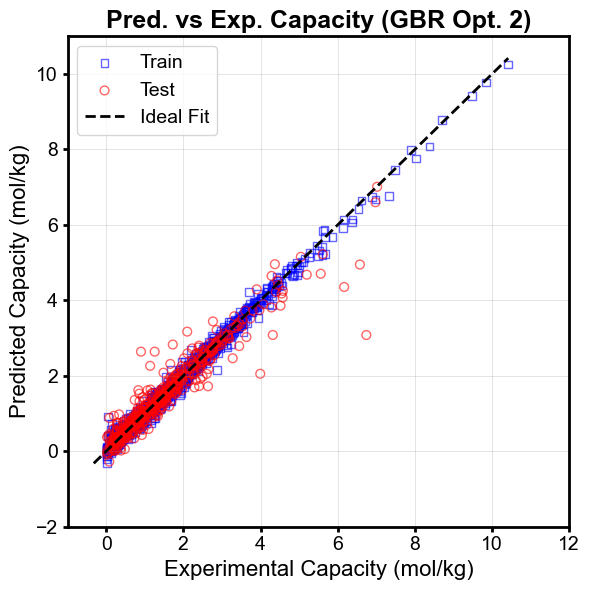


Figure saved as 'Pred. vs Exp. Capacity (GBR Opt. 2).png'
path: E:\RNZhang\CO2 capacity\Revised\Pred. vs Exp. Capacity (GBR Opt. 2).png


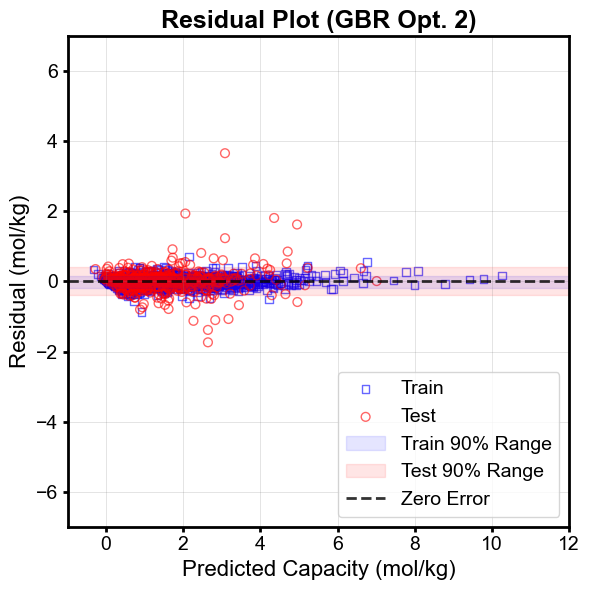


Figure saved as 'Residual Plot (GBR Opt. 2).png'
path: E:\RNZhang\CO2 capacity\Revised\Residual Plot (GBR Opt. 2).png


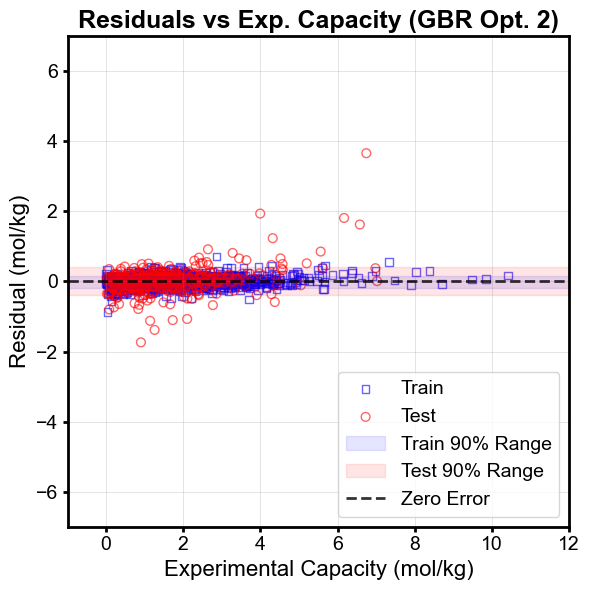


Figure saved as 'Residuals vs Exp. Capacity (GBR Opt. 2).png'
path: E:\RNZhang\CO2 capacity\Revised\Residuals vs Exp. Capacity (GBR Opt. 2).png
GBR Opt. 2 90% data range
training set: 90.0% in the range of [-0.1783, 0.1677] mol/kg
test set: 90.0% in the range of [-0.3984, 0.4096] mol/kg

overfitting: 0.2313 mol/kg


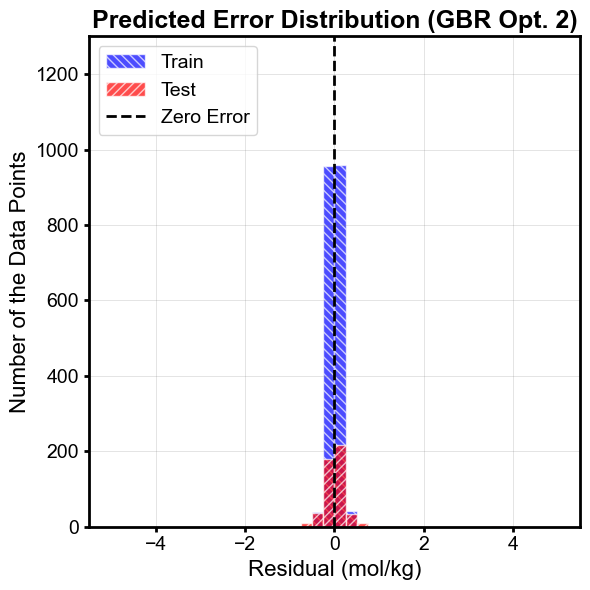


Figure saved as 'Predicted Error Distribution (GBR Opt. 2).png'
path: E:\RNZhang\CO2 capacity\Revised\Predicted Error Distribution (GBR Opt. 2).png
GBR Opt. 2 errors analysis

training set:
  [-1.000, -0.750]: 1 (0.1%)
  [-0.750, -0.500]: 2 (0.1%)
  [-0.500, -0.250]: 39 (1.9%)
  [-0.250, 0.000]: 956 (47.8%)
  [0.000, 0.250]: 958 (47.9%)
  [0.250, 0.500]: 42 (2.1%)
  [0.500, 0.750]: 2 (0.1%)

test set:
  [-1.750, -1.500]: 1 (0.2%)
  [-1.500, -1.250]: 1 (0.2%)
  [-1.250, -1.000]: 3 (0.6%)
  [-1.000, -0.750]: 2 (0.4%)
  [-0.750, -0.500]: 9 (1.8%)
  [-0.500, -0.250]: 36 (7.2%)
  [-0.250, 0.000]: 179 (35.8%)
  [0.000, 0.250]: 216 (43.2%)
  [0.250, 0.500]: 35 (7.0%)
  [0.500, 0.750]: 10 (2.0%)
  [0.750, 1.000]: 3 (0.6%)
  [1.000, 1.250]: 1 (0.2%)
  [1.500, 1.750]: 1 (0.2%)
  [1.750, 2.000]: 2 (0.4%)
  [3.500, 3.750]: 1 (0.2%)

GBR Opt. 2 ±0.25 data statistics
training set: 1914/2000 in the range of ±0.25 (95.7%)
test range: 395/500 in the range of ±0.25 (79.0%)


In [144]:
import matplotlib.pyplot as plt
import numpy as np
import os


plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']


train_y_pred = results['predictions']['y_train_pred']
test_y_pred = results['predictions']['y_test_pred']


plt.figure(figsize=(6, 6))


plt.scatter(y_train, train_y_pred, color='none', edgecolor='blue', 
           alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
plt.scatter(y_test, test_y_pred, color='none', edgecolor='red', 
           alpha=0.6, s=40, label="Test", linewidth=1, marker='o')


min_val = min(min(y_train), min(y_test), min(train_y_pred), min(test_y_pred))
max_val = max(max(y_train), max(y_test), max(train_y_pred), max(test_y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='black', 
         linestyle='--', linewidth=2, label='Ideal Fit')


plt.ylim(-2, 11)
plt.xlim(-1, 12)

plt.xlabel("Experimental Capacity (mol/kg)", fontsize=16, fontname='Arial')
plt.ylabel("Predicted Capacity (mol/kg)", fontsize=16, fontname='Arial')
plt.title("Pred. vs Exp. Capacity (GBR Opt. 2)", fontsize=18, fontweight='bold', fontname='Arial')


plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})


plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)


plt.tick_params(axis='both', which='major', width=2, color='black')


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('Pred. vs Exp. Capacity (GBR Opt. 2).png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'Pred. vs Exp. Capacity (GBR Opt. 2).png'")

png_absolute_path = os.path.abspath('Pred. vs Exp. Capacity (GBR Opt. 2).png')
print(f"path: {png_absolute_path}")



plt.figure(figsize=(6, 6))


train_errors = y_train - train_y_pred
test_errors = y_test - test_y_pred


def calculate_90_percent_range(errors):

    lower_bound = np.percentile(errors, 5)
    upper_bound = np.percentile(errors, 95)
    in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
    total = len(errors)
    percentage = (in_range / total) * 100
    return lower_bound, upper_bound, percentage


train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)


plt.scatter(train_y_pred, train_errors, alpha=0.6, s=30, color='none', 
            edgecolor='blue', linewidth=1, label='Train', marker='s')
plt.scatter(test_y_pred, test_errors, alpha=0.6, s=40, color='none', 
            edgecolor='red', linewidth=1, label='Test', marker='o')


plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')


plt.ylim(-7, 7)
plt.xlim(-1, 12)

plt.xlabel('Predicted Capacity (mol/kg)', fontsize=16, fontname='Arial')
plt.ylabel('Residual (mol/kg)', fontsize=16, fontname='Arial')
plt.title('Residual Plot (GBR Opt. 2)', fontsize=18, fontweight='bold', fontname='Arial')


plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 14})


plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)


plt.tick_params(axis='both', which='major', width=2, color='black')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('Residual Plot (GBR Opt. 2).png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'Residual Plot (GBR Opt. 2).png'")

png_absolute_path = os.path.abspath('Residual Plot (GBR Opt. 2).png')
print(f"path: {png_absolute_path}")



plt.figure(figsize=(6, 6))


plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
            edgecolor='blue', linewidth=1, label='Train', marker='s')
plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
            edgecolor='red', linewidth=1, label='Test', marker='o')


plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')


plt.ylim(-7, 7)
plt.xlim(-1, 12)

plt.xlabel('Experimental Capacity (mol/kg)', fontsize=16, fontname='Arial')
plt.ylabel('Residual (mol/kg)', fontsize=16, fontname='Arial')
plt.title('Residuals vs Exp. Capacity (GBR Opt. 2)', fontsize=18, fontweight='bold', fontname='Arial')


plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 14})


plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)


plt.tick_params(axis='both', which='major', width=2, color='black')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('Residuals vs Exp. Capacity (GBR Opt. 2).png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'Residuals vs Exp. Capacity (GBR Opt. 2).png'")

png_absolute_path = os.path.abspath('Residuals vs Exp. Capacity (GBR Opt. 2).png')
print(f"path: {png_absolute_path}")



print("="*80)
print("GBR Opt. 2 90% data range")
print("="*80)
print(f"training set: {train_percentage:.1f}% in the range of [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
print(f"test set: {test_percentage:.1f}% in the range of [{test_lower:.4f}, {test_upper:.4f}] mol/kg")



print("\n" + "="*80)
print(f"overfitting: {abs(max(abs(train_lower), abs(train_upper)) - max(abs(test_lower), abs(test_upper))):.4f} mol/kg")
print("="*80)



plt.figure(figsize=(6, 6))


bin_edges = []
current = 0
max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))


while current <= max_error + 0.25:
    bin_edges.extend([-current - 0.25, -current])
    if current != 0:
        bin_edges.extend([current, current + 0.25])
    current += 0.25


bin_edges = sorted(set(bin_edges))


plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
         edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
         edgecolor='white', label='Test', density=False, hatch='////')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')


plt.ylim(0, 1300)
plt.xlim(-5.5, 5.5)

plt.xlabel('Residual (mol/kg)', fontsize=16, fontname='Arial')
plt.ylabel('Number of the Data Points', fontsize=16, fontname='Arial') 
plt.title('Predicted Error Distribution (GBR Opt. 2)', fontsize=18, fontweight='bold', fontname='Arial')


plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})


plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)


plt.tick_params(axis='both', which='major', width=2, color='black')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_color('black')

plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('Predicted Error Distribution (GBR Opt. 2).png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigure saved as 'Predicted Error Distribution (GBR Opt. 2).png'")

png_absolute_path = os.path.abspath('Predicted Error Distribution (GBR Opt. 2).png')
print(f"path: {png_absolute_path}")


print("="*60)
print("GBR Opt. 2 errors analysis")
print("="*60)

def count_errors_in_ranges(errors, bin_edges, data_name):

    counts, _ = np.histogram(errors, bins=bin_edges)
    print(f"\n{data_name}:")
    for i in range(len(bin_edges) - 1):
        lower = bin_edges[i]
        upper = bin_edges[i + 1]
        count = counts[i]
        if count > 0:
            print(f"  [{lower:.3f}, {upper:.3f}]: {count} ({count/len(errors)*100:.1f}%)")


count_errors_in_ranges(train_errors, bin_edges, "training set")
count_errors_in_ranges(test_errors, bin_edges, "test set")


def count_in_025_range(errors):
    in_range = np.sum(np.abs(errors) <= 0.25)
    percentage = in_range / len(errors) * 100
    return in_range, percentage

train_in_range, train_percent = count_in_025_range(train_errors)
test_in_range, test_percent = count_in_025_range(test_errors)

print("\n" + "="*60)
print("GBR Opt. 2 ±0.25 data statistics")
print("="*60)
print(f"training set: {train_in_range}/{len(train_errors)} in the range of ±0.25 ({train_percent:.1f}%)")
print(f"test range: {test_in_range}/{len(test_errors)} in the range of ±0.25 ({test_percent:.1f}%)")



In [145]:

print("\n" + "="*80)
print("PREDICTION RESULTS FOR GBR OPT. 2  MODEL (WITH No. AND IL)")
print("="*80)


train_indices = X_train.index
test_indices = X_test.index


train_no = data.loc[train_indices, 'No.'].values
train_il = data.loc[train_indices, 'IL'].values
test_no = data.loc[test_indices, 'No.'].values
test_il = data.loc[test_indices, 'IL'].values


best_gbr = random_search.best_estimator_
y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)


train_df = pd.DataFrame({
    'No.': train_no,
    'IL': train_il,
    'Model': 'GBR_Opt_2',
    'Dataset': 'Train',
    'True_y': y_train.values,
    'Predicted_y': y_train_pred,
    'Absolute_Error': np.abs(y_train.values - y_train_pred),
    'Relative_Error_%': np.abs((y_train.values - y_train_pred) / np.clip(np.abs(y_train.values), 1e-10, None)) * 100
})


test_df = pd.DataFrame({
    'No.': test_no,
    'IL': test_il,
    'Model': 'GBR_Opt_1',
    'Dataset': 'Test',
    'True_y': y_test.values,
    'Predicted_y': y_test_pred,
    'Absolute_Error': np.abs(y_test.values - y_test_pred),
    'Relative_Error_%': np.abs((y_test.values - y_test_pred) / np.clip(np.abs(y_test.values), 1e-10, None)) * 100
})


all_predictions_df = pd.concat([train_df, test_df], ignore_index=True)


all_predictions_df = all_predictions_df.sort_values(['No.', 'Dataset']).reset_index(drop=True)


csv_filename = 'GBR Opt. 2_predictions_with_IDs.csv'
all_predictions_df.to_csv(csv_filename, index=False)
print(f"\nsave as '{csv_filename}'")
csv_absolute_path = os.path.abspath('GBR Opt. 2_predictions_with_IDs')
print(f"\npath '{csv_absolute_path}'")


print(f"include: {list(all_predictions_df.columns)}")



print("\nresults for the first 10 rows:")
print(all_predictions_df.head(10).round(4))


print("\nprediction error statistics:")
grouped_stats = all_predictions_df.groupby('Dataset').agg({
    'Absolute_Error': ['mean', 'std', 'min', 'max'],
    'Relative_Error_%': ['mean', 'std', 'min', 'max']
}).round(4)
print(grouped_stats)



import joblib
best_model_filename = 'best_GBR_Opt_2_model.pkl'
joblib.dump(best_gbr, best_model_filename)
print(f"\nbest model save as '{best_model_filename}'")
model_absolute_path = os.path.abspath('best_GBR_Opt_2_model.pkl')
print(f"path: {model_absolute_path}")



PREDICTION RESULTS FOR GBR OPT. 2  MODEL (WITH No. AND IL)

save as 'GBR Opt. 2_predictions_with_IDs.csv'

path 'E:\RNZhang\CO2 capacity\Revised\GBR Opt. 2_predictions_with_IDs'
include: ['No.', 'IL', 'Model', 'Dataset', 'True_y', 'Predicted_y', 'Absolute_Error', 'Relative_Error_%']

results for the first 10 rows:
   No.                  IL      Model Dataset  True_y  Predicted_y  \
0    1  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  0.8504       0.8641   
1    2  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  1.1442       1.0531   
2    3  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  1.4535       1.6417   
3    4  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  2.3503       2.3409   
4    5  [Bis(mim)C2][Gly]2  GBR_Opt_1    Test  2.4895       2.3667   
5    6  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  2.5823       2.3460   
6    7  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  2.6132       2.6909   
7    8  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  2.6441       2.7112   
8    9  [Bis(mim)C2][Gly]2  GBR_Opt_2   Train  2.7369

In [146]:
# end